In [24]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import altair as alt
import re
from vega_datasets import data
import seaborn as sns
sns.set()


In [10]:
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)

In [11]:
# Simple functions 
# Histogram
def basic_hist(col, title, x_name, y_name):
    """
    col: Dataframe column to be made into a histogram
    title: Histogram title
    x_name: X axis name label
    y_name: Y axis name label
    """
    color = tuple(np.random.choice(range(256), size=3))
    color = (color[0]/1000, color[1]/1000, color[2]/1000)
    plt.hist(col, color=color)
    plt.grid(linestyle='-')
    plt.xlabel(x_name, size='18')
    plt.ylabel(y_name, size='18')
    plt.title(title, size='20')
    plt.show()

def basic_bar(col, col_2, title, x_name, y_name):
    """
    col: Dataframe column to be made into a bar plot, names of each column
    col_2: Values of each column 
    title: Histogram title
    x_name: X axis name label
    y_name: Y axis name label
    """
    color = tuple(np.random.choice(range(256), size=3))
    color = (color[0]/1000, color[1]/1000, color[2]/1000)
    plt.bar(col, col_2, color=color)
    plt.grid(linestyle='-')
    plt.xlabel(x_name, size='18')
    plt.ylabel(y_name, size='18')
    plt.title(title, size='20')
    plt.show()    

## Número de Incidentes por Estado

In [12]:
df = pd.read_csv('../databases/gun_violence.zip', compression='zip')
num_incidentes = (df.groupby('state')
 .agg({'incident_id': 'count',
       'n_killed': 'sum',
       'n_injured': 'sum'})
 .rename(columns={'incident_id':'Number Of Incidents'})
 .sort_values(['Number Of Incidents', 'n_killed', 'n_injured'], ascending=False)
 .reset_index()
)
num_incidentes

,state,Number Of Incidents,n_killed,n_injured
0,Illinois,17556,3409,13514
1,California,16306,5562,7644
2,Florida,15029,3909,7072
3,Texas,13577,5046,6106
4,Ohio,10244,2508,5703
5,New York,9712,1705,5059
6,Pennsylvania,8929,2395,5056
7,Georgia,8925,2456,4056
8,North Carolina,8739,2225,4629
9,Louisiana,8103,2179,4398


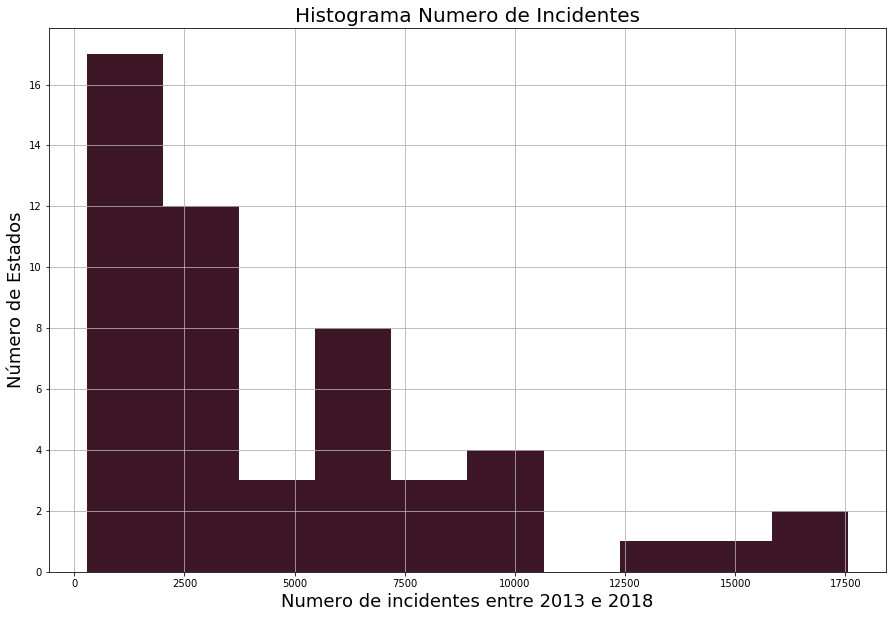

In [13]:
basic_hist(num_incidentes['Number Of Incidents'], 'Histograma Numero de Incidentes', 'Numero de incidentes entre 2013 e 2018', 'Número de Estados')

#### Por estado dos EUA

In [ ]:
alt.data_transformers.enable('default', max_rows=None)

In [ ]:
gun_violence = pd.read_csv('../databases/gun_violence_clean.zip', compression='zip')

In [ ]:
# TODO: Divide the number of incides by the population to get the number of incidents per capita.

states = alt.topo_feature(data.us_10m.url, 'states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

points = alt.Chart(gun_violence).transform_aggregate(
    latitude='mean(latitude)',
    longitude='mean(longitude)',
    count='count()',
    groupby=['state']
).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.Size('count:Q', title='Number of Incidents'),
    color=alt.value('steelblue'),
    tooltip=['state:N','count:Q']
).properties(
    title='Number of gun incidents per state in the US'
)

background + points

# alt.Chart(gun_violence).mark_bar().encode(
#     alt.X('state', axis=alt.Axis(title='Estado')),
#     alt.Y('count()', axis=alt.Axis(title='Número de Registros'))
# )

#### Ao longo dos anos

In [ ]:
alt.Chart(gun_violence).mark_rect().encode(
    alt.X('month', axis=alt.Axis(title='Mês')),
    alt.Y('year', sort='descending', axis=alt.Axis(title='Ano')),
    alt.Color('count()')
).properties(
    width=500,
    height=300
)

## Idade dos envolvidos

In [ ]:
participants = pd.read_csv('../databases/participants_clean.zip', compression='zip')

In [ ]:
alt.Chart(participants).mark_bar().encode(
    alt.X('participant_age:Q', bin=alt.BinParams(extent=[0,100], step=5), title='Idade'),
    alt.Y('count()', title='Frequência'),
    color='participant_type'
).properties(
    width=500,
    height=300
)

## Trends

In [14]:
df = pd.read_csv('../databases/gun_violence.zip', compression='zip')

### Incidents per year

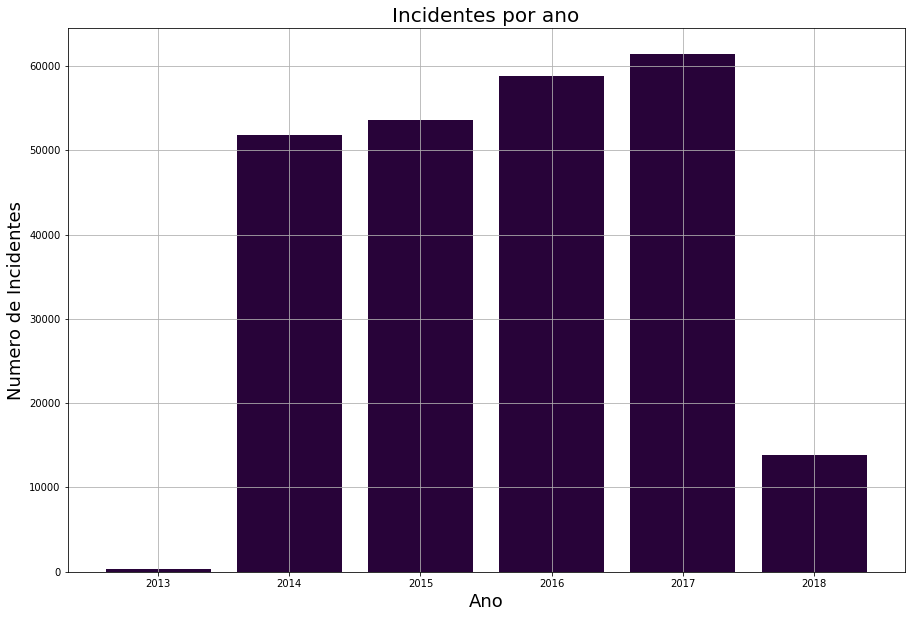

In [15]:
df['year'] = df['date'].map(lambda x: x[0:4])
a_per_year = (df.groupby('year')
              .agg({'incident_id': 'count'})
              .reset_index()
              .rename(columns={'incident_id':'Number Of Incidents'}))

title = 'Incidentes por ano'
x = 'Ano'
y = 'Numero de Incidentes'
basic_bar(a_per_year['year'], a_per_year['Number Of Incidents'], title, x, y)

Observado uma tendência crescente de 2014 até 2017. 
2018 não possui dados completos do ano todo, a expectativa na época de coleta da base era de crescimento em comparação a 2017.
2013 é um ano de baixo número de entradas na base.

###  Average per month

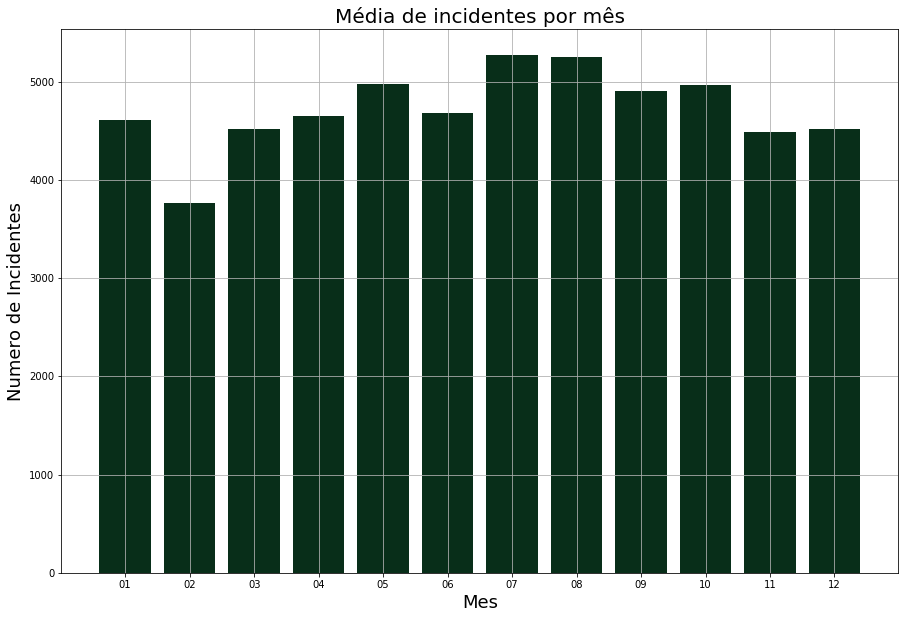

In [17]:
df['year-month'] = df['date'].map(lambda x: x[0:4] + '-' + x[5:7])

df = df[df['year-month'] > '2013-12']

mean_per_month = (df.groupby('year-month')
              .agg({'incident_id': 'count'})
              .reset_index()
              .rename(columns={'incident_id':'Number Of Incidents'}))

mean_per_month['month'] = mean_per_month['year-month'].map(lambda x: x[5:7])

mean_per_month = (mean_per_month.groupby('month')
              .agg({'Number Of Incidents': 'mean'})
              .reset_index())

title = 'Média de incidentes por mês'
x = 'Mes'
y = 'Numero de Incidentes'
basic_bar(mean_per_month['month'], mean_per_month['Number Of Incidents'], title, x, y)

Julho e Agosto são os meses com maior número médio de incidentes, por volta de 5200 todo ano.
Fevereiro é o mês com menor número de incidentes, por volta de 3700 todo ano.

###  Série temportal para total de incidentes, mortos e feridos

In [61]:
df = pd.read_csv('../databases/gun_violence.zip', compression='zip')

In [62]:
df['year'] = df['date'].map(lambda x: x[0:4])
df['year-month'] = df['date'].map(lambda x: x[0:4] + '-' + x[5:7])

### 2014 time series


In [ ]:
temp = df[df['year'] == '2014'].groupby('date')\
                               .agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'})\
                               .reset_index()\
                               .rename(columns={'state' : 'incidents'})

In [ ]:
labels = df[df['year'] == '2014'].groupby('year-month').count().reset_index()

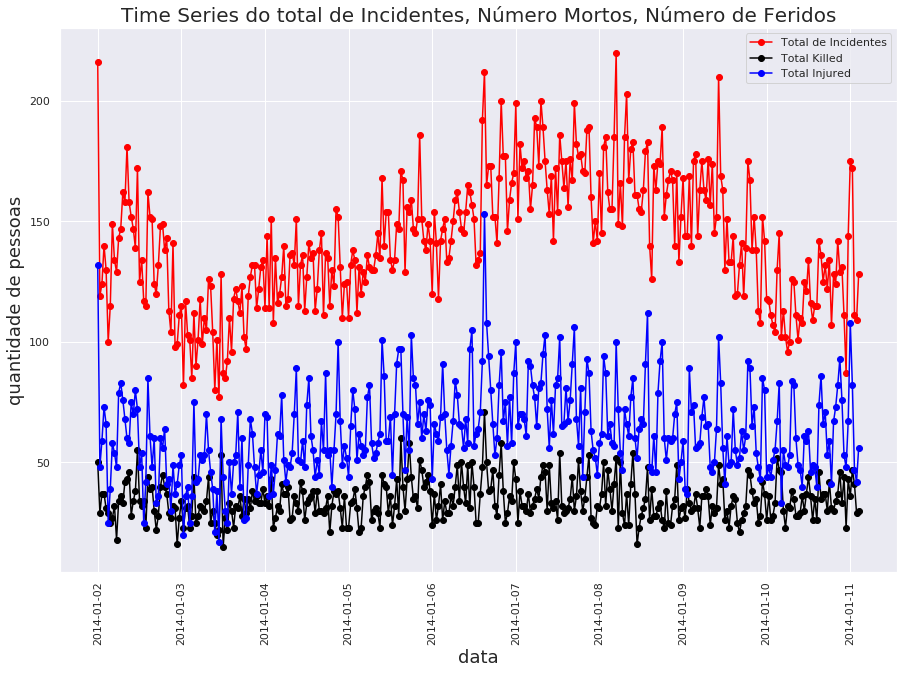

In [75]:

title = '2014, Time Series do total de Incidentes, Número Mortos, Número de Feridos' 
f, ax = plt.subplots()
ax.plot(temp['date'], temp['incidents'], label='Total de Incidentes', color = 'red',  marker='o')
ax.plot(temp['date'], temp['n_killed'], label="Total Killed", color = 'black',  marker='o')
ax.plot(temp['date'], temp['n_injured'], label="Total Injured", color = 'blue', marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('data', size='18')
ax.set_ylabel('quantidade de pessoas', size='18')
ax.set_title(title, size='20')
ax.set_xticklabels(labels['year-month'], rotation='90')

ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.legend()
plt.show()


### 2015 time series


In [76]:
temp = df[df['year'] == '2015'].groupby('date')\
                               .agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'})\
                               .reset_index()\
                               .rename(columns={'state' : 'incidents'})

In [ ]:
labels = df[df['year'] == '2014'].groupby('year-month').count().reset_index()

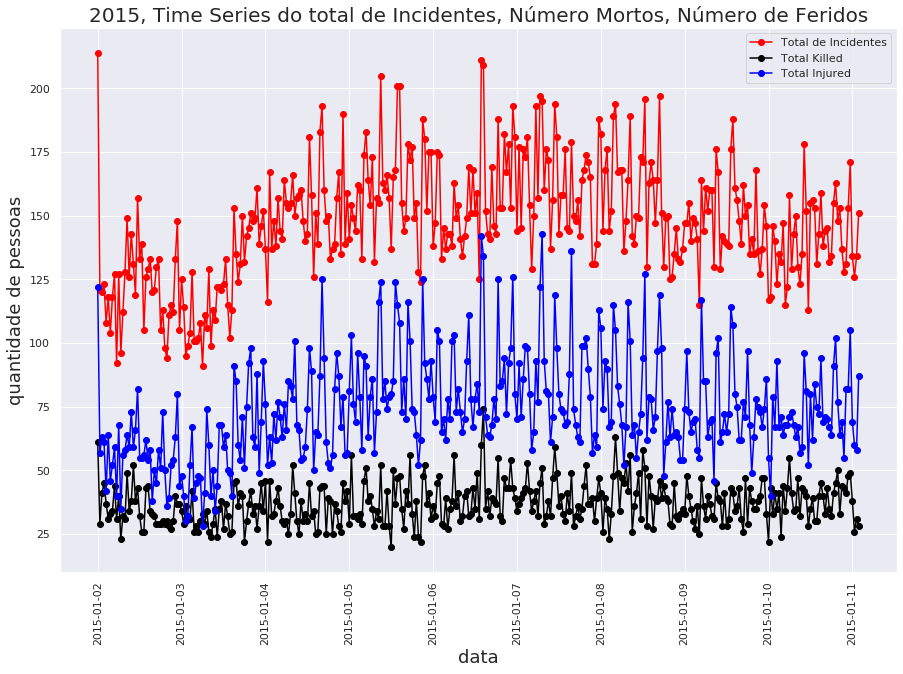

In [77]:

title = '2015, Time Series do total de Incidentes, Número Mortos, Número de Feridos' 
f, ax = plt.subplots()
ax.plot(temp['date'], temp['incidents'], label='Total de Incidentes', color = 'red',  marker='o')
ax.plot(temp['date'], temp['n_killed'], label="Total Killed", color = 'black',  marker='o')
ax.plot(temp['date'], temp['n_injured'], label="Total Injured", color = 'blue', marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('data', size='18')
ax.set_ylabel('quantidade de pessoas', size='18')
ax.set_title(title, size='20')
ax.set_xticklabels(labels['date'], rotation='90')

ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.legend()
plt.show()


### 2016 time series


In [108]:
temp = df[df['year'] == '2016'].groupby('date')\
                               .agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'})\
                               .reset_index()\
                               .rename(columns={'state' : 'incidents'})

In [109]:
labels = df[df['year'] == '2016'].groupby('year-month').count().reset_index()

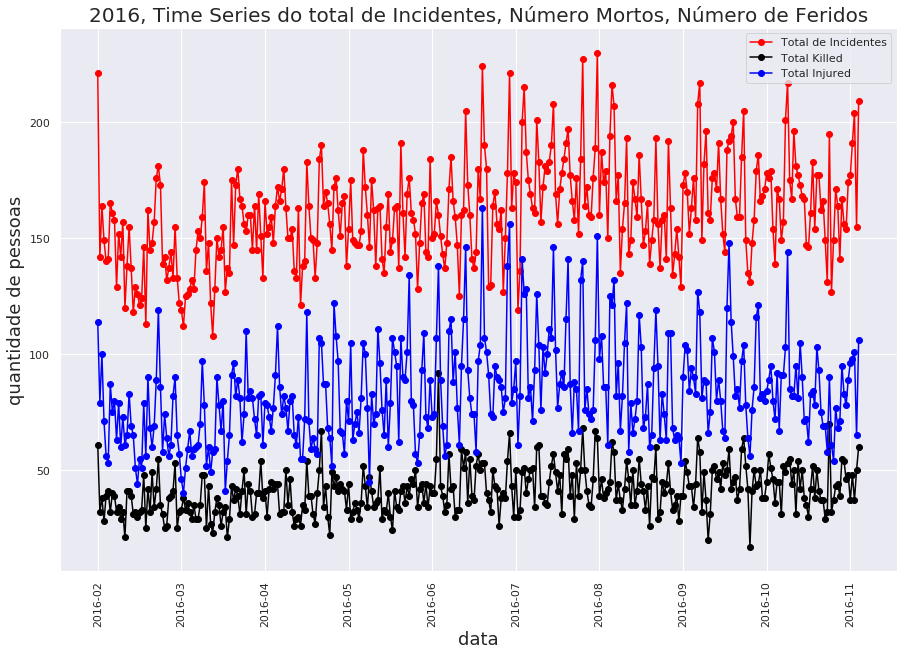

In [112]:

title = '2016, Time Series do total de Incidentes, Número Mortos, Número de Feridos' 
f, ax = plt.subplots()
ax.plot(temp['date'], temp['incidents'], label='Total de Incidentes', color = 'red',  marker='o')
ax.plot(temp['date'], temp['n_killed'], label="Total Killed", color = 'black',  marker='o')
ax.plot(temp['date'], temp['n_injured'], label="Total Injured", color = 'blue', marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('data', size='18')
ax.set_ylabel('quantidade de pessoas', size='18')
ax.set_title(title, size='20')
ax.set_xticklabels(labels['year-month'], rotation='90')

ax.xaxis.set_major_locator(plt.MaxNLocator(13))
plt.legend()
plt.show()


### 2017 time series


In [96]:
temp = df[df['year'] == '2017'].groupby('date')\
                               .agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'})\
                               .reset_index()\
                               .rename(columns={'state' : 'incidents'})

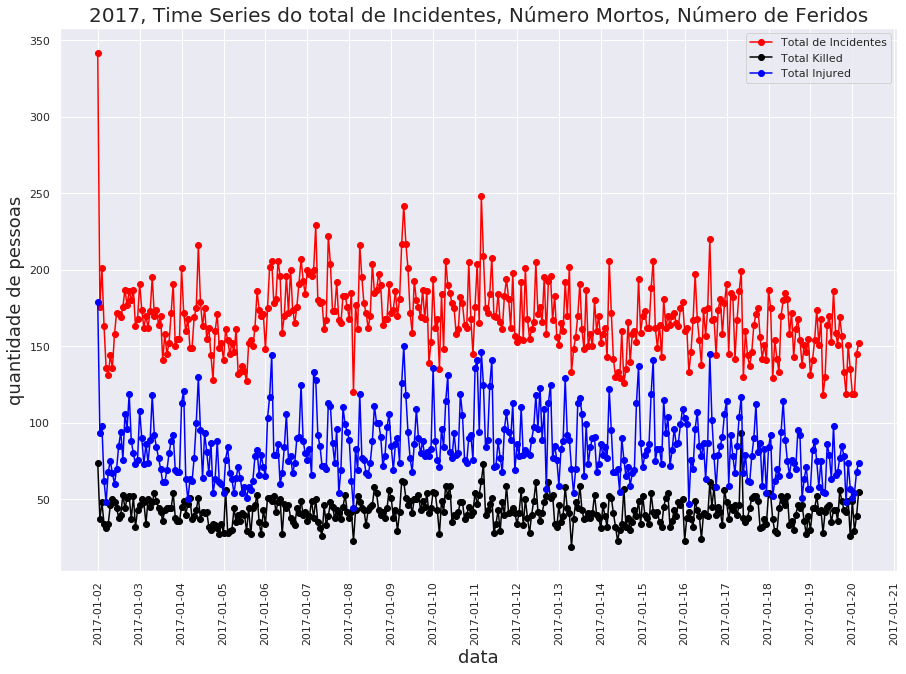

In [97]:

title = '2017, Time Series do total de Incidentes, Número Mortos, Número de Feridos' 
f, ax = plt.subplots()
ax.plot(temp['date'], temp['incidents'], label='Total de Incidentes', color = 'red',  marker='o')
ax.plot(temp['date'], temp['n_killed'], label="Total Killed", color = 'black',  marker='o')
ax.plot(temp['date'], temp['n_injured'], label="Total Injured", color = 'blue', marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('data', size='18')
ax.set_ylabel('quantidade de pessoas', size='18')
ax.set_title(title, size='20')
ax.set_xticklabels(temp['date'], rotation='90')

ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.legend()
plt.show()


### Todos os anos time series


In [92]:
temp = df[df['year-month'] > '2013-12'].groupby('year-month')\
         .agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'})\
         .reset_index()\
         .rename(columns={'state' : 'incidents'})

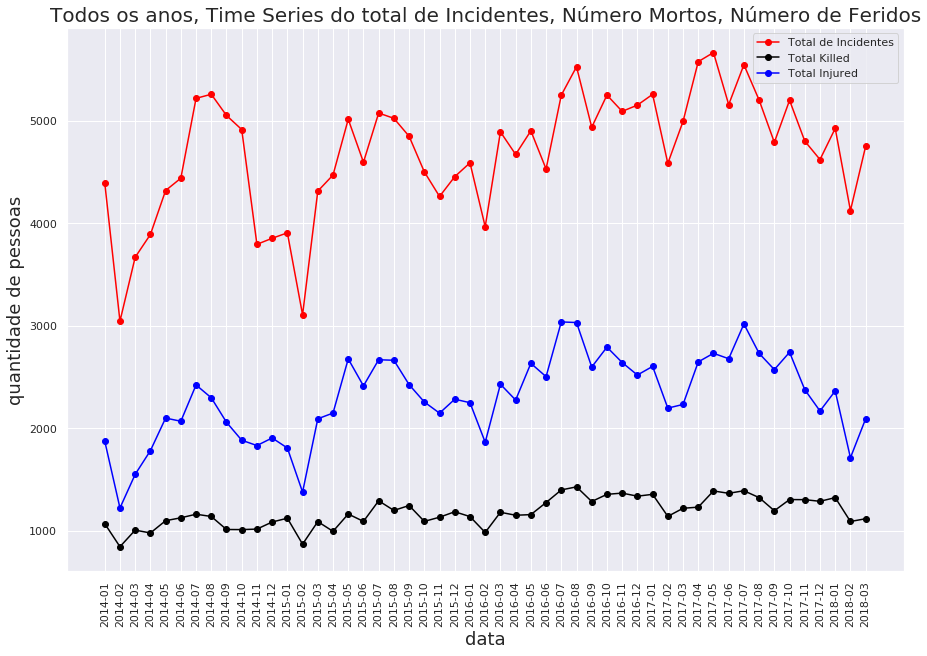

In [94]:
title = 'Todos os anos, Time Series do total de Incidentes, Número Mortos, Número de Feridos' 
f, ax = plt.subplots()
ax.plot(temp['year-month'], temp['incidents'], label='Total de Incidentes', color = 'red',  marker='o')
ax.plot(temp['year-month'], temp['n_killed'], label="Total Killed", color = 'black',  marker='o')
ax.plot(temp['year-month'], temp['n_injured'], label="Total Injured", color = 'blue', marker='o')
ax.grid(linestyle='-')
ax.set_xlabel('data', size='18')
ax.set_ylabel('quantidade de pessoas', size='18')
ax.set_title(title, size='20')
ax.set_xticklabels(temp['year-month'], rotation='90')

plt.legend()
plt.show()
